In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/nitindhami/Desktop/@Projects/PythonProjects/StockPrediction/archive/NIFTY 100_Data.csv')
df.head(200)

,Date,Open,High,Low,Close
0,12 Aug 2022,17916.65,17982.90,17857.75,17956.80
1,11 Aug 2022,17955.90,17962.35,17883.10,17913.95
2,10 Aug 2022,17829.45,17829.45,17695.80,17784.90
3,08 Aug 2022,17664.20,17799.90,17621.15,17784.80
4,05 Aug 2022,17699.35,17747.40,17625.35,17655.50
...,...,...,...,...,...
195,01 Nov 2021,17996.55,18156.45,17901.5,18134.60
196,29 Oct 2021,18010.55,18114.5,17782.45,17880.80
197,28 Oct 2021,18368.25,18369.65,17971.6,18028.10
198,27 Oct 2021,18457.2,18515.8,18348.25,18390.05


<Axes: xlabel='Date', ylabel='Close'>

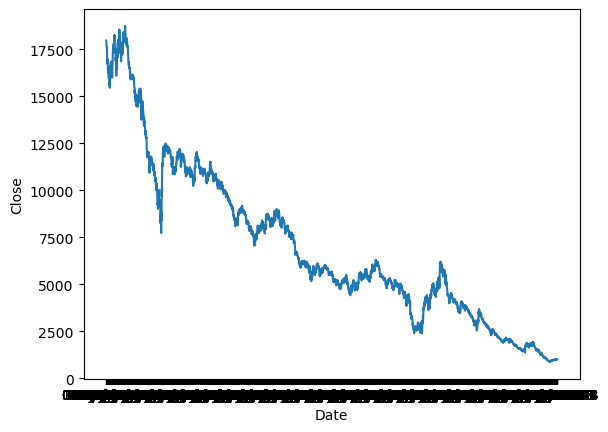

In [4]:
sns.lineplot(x='Date', y='Close', data=df)


Nifty Index is in reverse as the data is currently not in the sequential manner now let's make it sequential so that it shows line plot correctly.

In [5]:

# Make sure Date is sorted
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)


In [6]:
df.head(200)

,Date,Open,High,Low,Close
0,2003-01-01,-,-,-,1000.00
1,2003-01-02,NaN,NaN,NaN,1008.00
2,2003-01-03,NaN,NaN,NaN,1004.40
3,2003-01-06,NaN,NaN,NaN,999.85
4,2003-01-07,NaN,NaN,NaN,997.81
...,...,...,...,...,...
195,2003-10-10,NaN,NaN,NaN,1457.40
196,2003-10-13,NaN,NaN,NaN,1481.30
197,2003-10-14,NaN,NaN,NaN,1453.30
198,2003-10-15,NaN,NaN,NaN,1471.50


In [7]:
df.isnull().sum()

Date       0
Open     778
High     778
Low      778
Close      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4100 entries, 0 to 4877
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4100 non-null   datetime64[ns]
 1   Open    4100 non-null   object        
 2   High    4100 non-null   object        
 3   Low     4100 non-null   object        
 4   Close   4100 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 192.2+ KB


In [11]:
# Convert all columns EXCEPT 'Date' to numeric (safely)
for col in df.columns:
    if col != 'Date':
        df[col] = pd.to_numeric(df[col], errors='coerce')



In [14]:
df.dropna(inplace=True)

<Axes: xlabel='Date', ylabel='Close'>

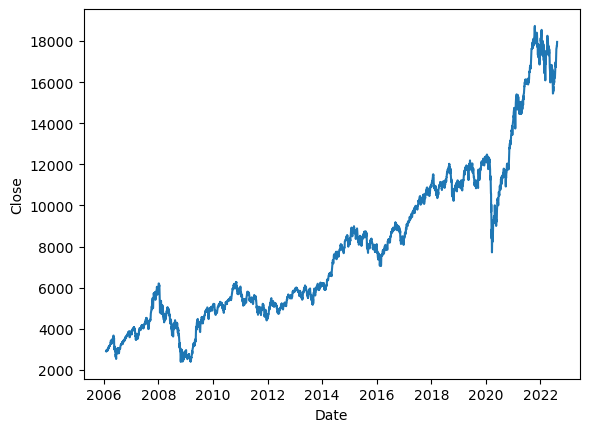

In [15]:
sns.lineplot(x='Date', y='Close', data=df)

In [16]:
# Create lag features
for i in range(1, 6):
    df[f'Open_lag_{i}'] = df['Open'].shift(i)
    df[f'Close_lag_{i}'] = df['Close'].shift(i)

# Drop rows with NaNs caused by shifting
df.dropna(inplace=True)

# Define features and target
features = [col for col in df.columns if 'lag' in col]
target = 'Open'



In [17]:
df.head(200)

,Date,Open,High,Low,Close,Open_lag_1,Close_lag_1,Open_lag_2,Close_lag_2,Open_lag_3,Close_lag_3,Open_lag_4,Close_lag_4,Open_lag_5,Close_lag_5
784,2006-02-08,2954.10,2963.60,2933.90,2956.3,2954.35,2964.9,2891.45,2942.3,2900.70,2889.2,2929.80,2910.8,2951.90,2913.5
785,2006-02-10,2968.55,2981.05,2963.55,2977.6,2954.10,2956.3,2954.35,2964.9,2891.45,2942.3,2900.70,2889.2,2929.80,2910.8
786,2006-02-13,2982.25,2993.80,2972.40,2992.5,2968.55,2977.6,2954.10,2956.3,2954.35,2964.9,2891.45,2942.3,2900.70,2889.2
787,2006-02-14,2999.20,3004.25,2963.25,2970.0,2982.25,2992.5,2968.55,2977.6,2954.10,2956.3,2954.35,2964.9,2891.45,2942.3
788,2006-02-15,2992.75,2999.10,2947.65,2971.6,2999.20,2970.0,2982.25,2992.5,2968.55,2977.6,2954.10,2956.3,2954.35,2964.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2006-11-17,3775.50,3775.85,3715.00,3732.4,3765.50,3764.4,3767.50,3761.3,3761.70,3747.4,3724.65,3741.7,3691.45,3718.2
980,2006-11-20,3699.90,3736.65,3667.85,3728.7,3775.50,3732.4,3765.50,3764.4,3767.50,3761.3,3761.70,3747.4,3724.65,3741.7
981,2006-11-21,3744.65,3792.20,3743.40,3790.1,3699.90,3728.7,3775.50,3732.4,3765.50,3764.4,3767.50,3761.3,3761.70,3747.4
982,2006-11-22,3806.90,3829.00,3801.30,3823.7,3744.65,3790.1,3699.90,3728.7,3775.50,3732.4,3765.50,3764.4,3767.50,3761.3


In [18]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

# You could also use time-based split, but here's the simplest method:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 10372.46602159543
R2 Score: 0.9986832360569738


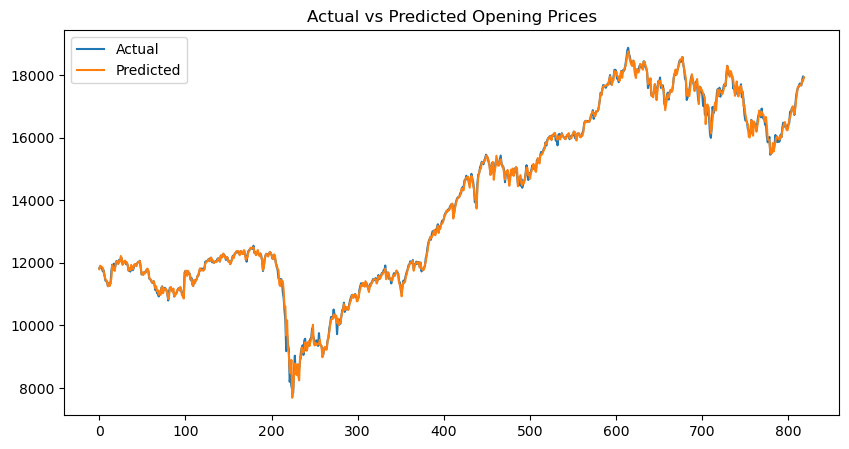

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Opening Prices")
plt.show()


In [ ]:
import pandas as pd

# Data from last 5 days
data = {
    "Date": ["2025-05-28", "2025-05-27", "2025-05-26", "2025-05-23", "2025-05-22"],
    "Open": [25450.95, 25561.70, 25527.45, 25255.05, 25334.80],
    "Close": [25361.10, 25436.35, 25596.50, 25453.00, 25221.90]
}

df1 = pd.DataFrame(data)
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.sort_values('Date', ascending=False)

# Manually construct lag features
input_dict = {}
for i in range(1, 6):
    input_dict[f'Open_lag_{i}'] = df1['Open'].iloc[i - 1]
    input_dict[f'Close_lag_{i}'] = df1['Close'].iloc[i - 1]

input_df = pd.DataFrame([input_dict])

# Predict
predicted_open = model.predict(input_df)[0]
print("🔮 Predicted Opening Price for Tomorrow:", round(predicted_open, 2))

🔮 Predicted Opening Price for Tomorrow: 25390.6
